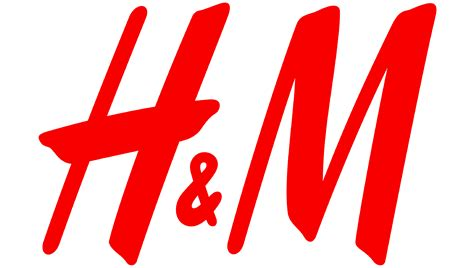

# Table of Contents

* Exploratory Data Analysis & data preprocessing
    * Loading data
    * Exploring articles.csv](#articles)
    * Exploring customers.csv
    * Exploring transactions_train.csv.csv
    * Structure of data and link between datasets
  

# Exploratory Data Analysis & data preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Loading data <a class="anchor" id="data"></a>

In [2]:
# articles = pd.read_csv('./Data/articles.csv')

raw_articles = pd.read_csv('./Data/articles.csv', dtype={'article_id': 'str','customer_id':'str'})
articles=raw_articles.copy()

In [3]:
raw_customers = pd.read_csv('./Data/customers.csv')
customers=raw_customers.copy()

In [4]:
raw_transactions=pd.read_csv('./Data/transactions_train.csv', dtype={'article_id': 'str','customer_id':'str'})
transactions=raw_transactions.copy()

In [5]:
len(transactions)

31788324

## Q1. Top 100 most sold products

In [99]:
Sold_quantities=transactions.groupby('article_id').agg(quantities_sold=('price','count'))
Sold_quantities=Sold_quantities.reset_index()
ordered_sold_quantities=Sold_quantities.sort_values('quantities_sold',ascending=False)

In [100]:
top_100=ordered_sold_quantities.head(100)

In [101]:
total_sales=Sold_quantities['quantities_sold'].sum()
top_100=top_100.reset_index()
top_100['quantities_sold_%']=round(top_100['quantities_sold']*100/total_sales,2)

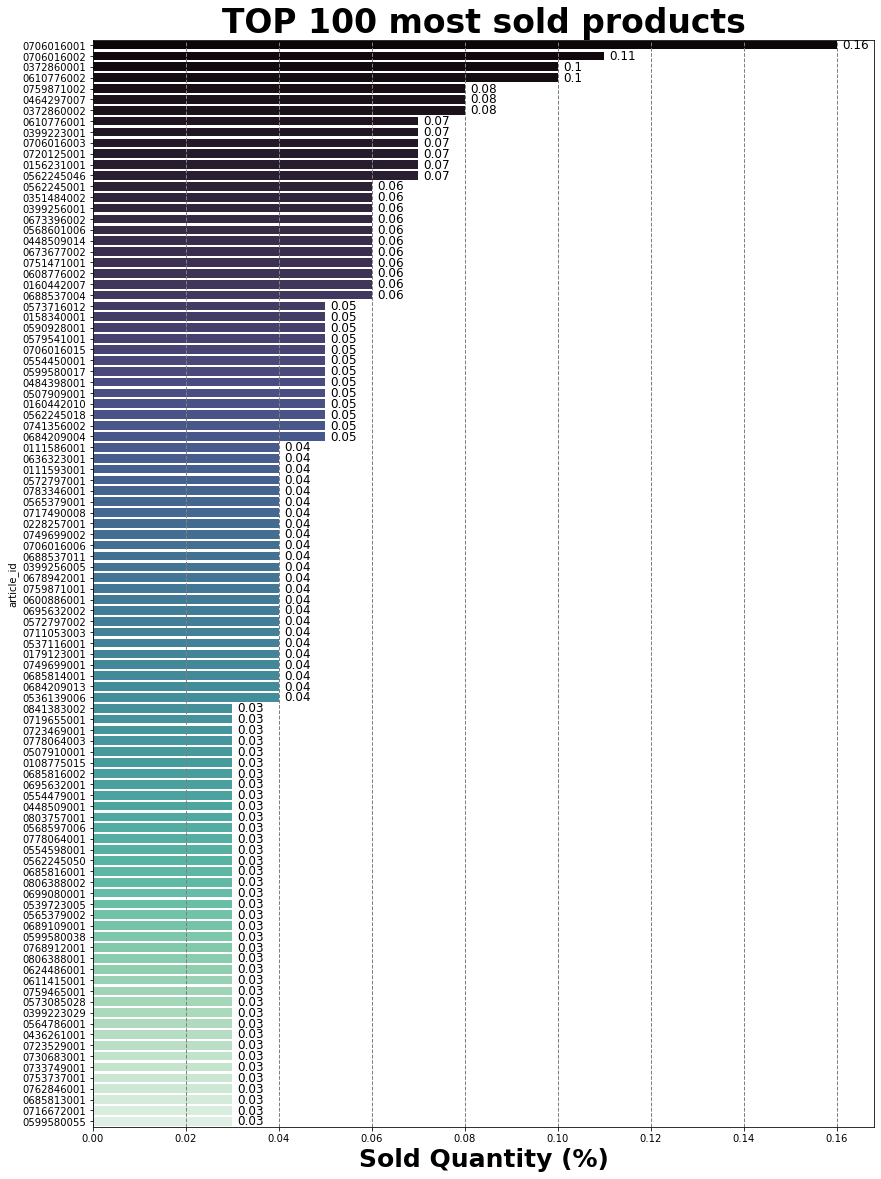

In [102]:
plt.figure(figsize=(14,20))
plt.title("TOP 100 most sold products", fontsize=33, fontweight="bold")
g = sns.barplot(y="article_id", x="quantities_sold_%", data=top_100, palette="mako", ci=False,orient='h')

for container in g.containers:
    g.bar_label(container, padding = 5, fontsize=12)
plt.xlabel("Sold Quantity (%)", size=25, fontweight="bold")
plt.ylabel("article_id")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1)
plt.show()

## Q2. Top 100 most profitable products

In [76]:
products_revenues=transactions.groupby('article_id').agg(revenues=('price','sum'))
products_revenues=products_revenues.reset_index()
ordered_revenues=products_revenues.sort_values('revenues',ascending=False)
# top_100_products=ordered_revenues.head(100)
# top_30_products=ordered_revenues.head(30)

In [77]:
# top_100_products_details=top_100_products.merge(articles,on='article_id')
# top_30_products_details=top_30_products.merge(articles,on='article_id')
revenues_details=ordered_revenues.merge(articles,on='article_id')
revenues_details.head(30)

,article_id,revenues,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0706016001,1631.732102,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
1,0706016002,1136.321085,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,71,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
2,0568601006,939.268593,568601,Mariette Blazer,264,Blazer,Garment Upper body,1010016,Solid,9,...,Suit,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1008,Dressed,Fitted jacket in woven fabric with notch lapel...
3,0448509014,781.478390,448509,Perrie Slim Mom Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,72,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,"5-pocket, ankle-length jeans in washed, sturdy..."
4,0706016003,692.195915,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,73,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
5,0399223001,686.484780,399223,Curvy Jeggings HW Ankle,272,Trousers,Garment Lower body,1010016,Solid,9,...,Denim Trousers,D,Divided,2,Divided,57,Ladies Denim,1016,Trousers Denim,"Jeggings in washed, superstretch denim with a ..."
6,0720125001,683.606542,720125,SUPREME RW tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,...,Ladies Sport Bottoms,S,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...
7,0562245046,656.213763,562245,Luna skinny RW,272,Trousers,Garment Lower body,1010016,Solid,9,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,"5-pocket jeans in washed, superstretch denim w..."
8,0751471001,590.639949,751471,Pluto RW slacks (1),272,Trousers,Garment Lower body,1010016,Solid,9,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Ankle-length cigarette trousers in a stretch w...
9,0562245001,535.719898,562245,Luna skinny RW,272,Trousers,Garment Lower body,1010016,Solid,9,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,"5-pocket jeans in washed, superstretch denim w..."


## Q3 - Which are articles that generated lower earnings for the company?

In [106]:
revenues_details.tail(30)

,article_id,revenues,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
104517,0556055001,0.001441,556055,Cool Amy scrunchie,73,Hair string,Accessories,1010001,All over pattern,73,...,Hair Accessories,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Scrunchie covered in a paisley-patterned weave.
104518,0535491001,0.001441,535491,Erasers,78,Other accessories,Accessories,1010016,Solid,52,...,Small Acc. Jewellery & Other,J,"Children Accessories, Swimwear",4,Baby/Children,43,"Kids Accessories, Swimwear & D",1019,Accessories,Erasers in various colours and designs. Size a...
104519,0621620007,0.001424,621620,SARA cycle shorts (1),274,Shorts,Garment Lower body,1010016,Solid,10,...,Young Girl Jersey Basic,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1002,Jersey Basic,Short cycling shorts in organic cotton jersey ...
104520,0596956004,0.001407,596956,Kalle,255,T-shirt,Garment Upper body,1010001,All over pattern,31,...,Baby Boy Jersey Fancy,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1005,Jersey Fancy,T-shirt in cotton jersey with a press-stud on ...
104521,0526733002,0.001356,526733,Daiquiri,255,T-shirt,Garment Upper body,1010017,Stripe,9,...,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,Cropped jersey T-shirt with an embroidered det...
104522,0480059003,0.001339,480059,TEA sock,302,Socks,Socks & Tights,1010016,Solid,73,...,Ladies Sport Acc,S,Sport,26,Sport,5,Ladies H&M Sport,1019,Accessories,Fine-knit trainer socks in fast-drying functio...
104523,0659579001,0.001339,659579,MILLA jersey beanie fancy,75,Hat/beanie,Accessories,1010015,Sequin,7,...,Kids Girl Big Acc,J,"Children Accessories, Swimwear",4,Baby/Children,45,Kids Outerwear,1019,Accessories,Double-layered hat in cotton jersey with a hea...
104524,0344627006,0.001288,344627,BASIC Sunhat,76,Hat/brim,Accessories,1010001,All over pattern,51,...,Kids Girl Big Acc,J,"Children Accessories, Swimwear",4,Baby/Children,45,Kids Outerwear,1019,Accessories,Sun hat in a cotton weave. Width of brim 5 cm....
104525,0553785002,0.001220,553785,Luna hairterries,73,Hair string,Accessories,1010016,Solid,50,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Small plastic hair elastics.
104526,0526708032,0.001000,526708,Terrier TM,255,T-shirt,Garment Upper body,1010017,Stripe,21,...,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,"Wide, cropped jersey T-shirt with a print moti..."


## Q4. Average product bought by age group

In [82]:
customers['age_groups'] = pd.cut(customers['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')], labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])

In [117]:
quant_per_cust=transactions.groupby('customer_id').agg(purchased_quantities=('price','count'))
purchases=quant_per_cust.merge(customers,on='customer_id').sort_values('purchased_quantities',ascending=False)
group_age_purchases=purchases.groupby('age_groups').agg(avg_purchase=('purchased_quantities',np.mean))
group_age_purchases['avg_purchase']=group_age_purchases['avg_purchase'].apply(lambda x:round(x,0))

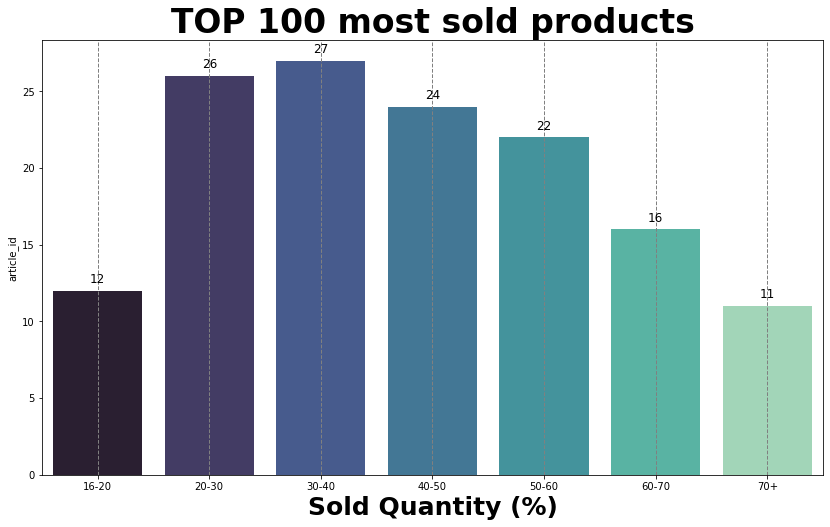

In [118]:
plt.figure(figsize=(14,8))
plt.title("TOP 100 most sold products", fontsize=33, fontweight="bold")
g = sns.barplot(y="avg_purchase", x="age_groups", data=group_age_purchases.reset_index(), palette="mako", ci=False,orient='v')

for container in g.containers:
    g.bar_label(container, padding = 5, fontsize=12)
plt.xlabel("Sold Quantity (%)", size=25, fontweight="bold")
plt.ylabel("article_id")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1)
plt.show()

## Q5 - Are there articles that have been sold only once?

In [89]:
num_sold=transactions.groupby('article_id').agg(num_sold=('price','count')).sort_values('num_sold')

In [91]:
once=num_sold[num_sold['num_sold']==1]

In [119]:
len(once)

4491

## Q6 - Which age group generates more earnings?

In [120]:
earnings_per_customer=transactions.groupby('customer_id').agg(earnings=('price','sum'))

In [121]:
cust_with_earnings=earnings_per_customer.merge(customers,on='customer_id').sort_values('earnings',ascending=False)

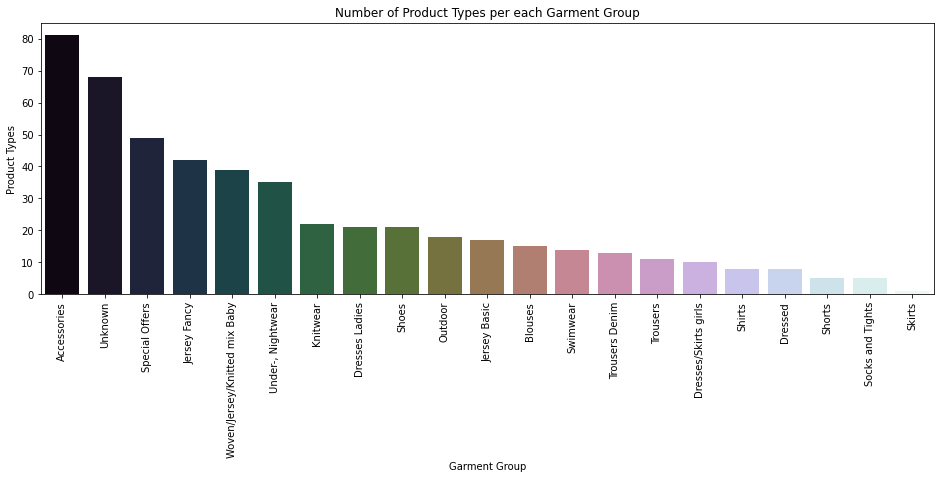

In [122]:
temp = articles.groupby(["garment_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({"Garment Group": temp.index, "Product Types": temp.values})
df = df.sort_values(["Product Types"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of Product Types per each Garment Group")
s = sns.barplot(x="Garment Group", y="Product Types", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

## Q7 - What is the age distribition of customers

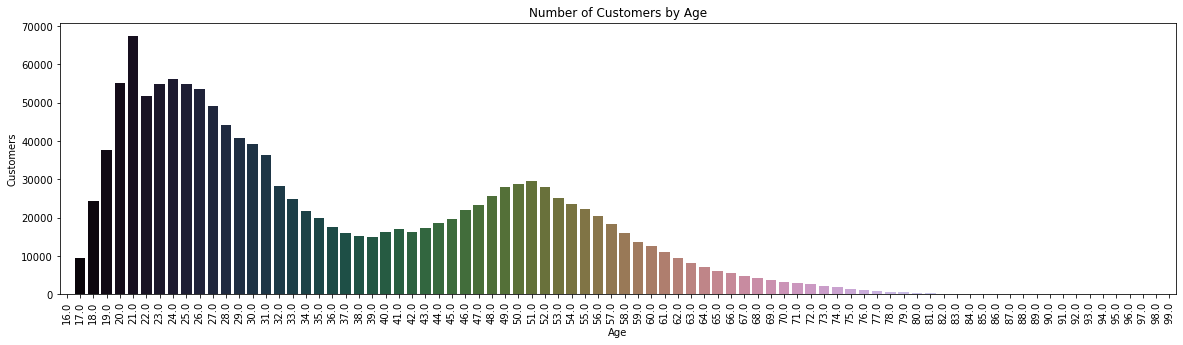

In [98]:
temp = customers.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({"Age": temp.index, "Customers": temp.values})
df = df.sort_values(["Age"], ascending=False)
plt.figure(figsize=(20, 5))
plt.title(f"Number of Customers by Age")
s = sns.barplot(x="Age", y="Customers", data=df, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()